In [7]:
# Import modules for our task

import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [8]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
# Read AdSmart_AB_testing_data 

data  = pd.read_csv('../data/AdSmart_AB_testing_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [11]:
data.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [12]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [19]:
data.describe()

,hour,platform_os,yes,no
count,1243.00,1243.00,1243.00,1243.00
mean,11.52,5.99,0.46,0.54
std,5.77,0.12,0.50,0.50
min,0.00,5.00,0.00,0.00
25%,7.00,6.00,0.00,0.00
50%,13.00,6.00,0.00,1.00
75%,15.00,6.00,1.00,1.00
max,23.00,6.00,1.00,1.00


In [14]:
data.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,4071,4071,4071,4071,4071,4071,4071,4071
exposed,4006,4006,4006,4006,4006,4006,4006,4006


In [15]:
indexNames = data[(data['yes'] == 0) & (data['no'] == 0)].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [16]:
data.tail(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1


In [17]:
data.shape

(1243, 9)

<AxesSubplot:ylabel='yes,no'>

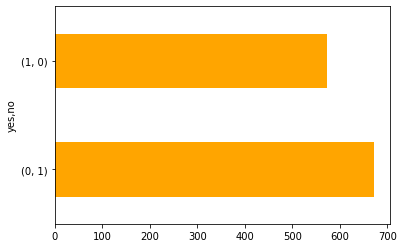

In [18]:
data[['yes','no']].value_counts().plot(kind='barh',color='orange')

In [20]:
# Select columns for our analysis

check_exp_df = data[['auction_id', 'experiment', 'yes', 'no']]
check_exp_df.shape

(1243, 4)

In [21]:
check_exp_df['responded_yes'] = 0
check_exp_df.loc[check_exp_df['yes'] == 1, 'responded_yes'] = 1
check_exp_df.loc[check_exp_df['yes'] == 0, 'responded_yes'] = 0
check_exp_df.drop(columns=['yes', 'no'], inplace=True)
check_exp_df = check_exp_df.set_index('auction_id')

In [22]:
check_exp_df.head(5)

,experiment,responded_yes
auction_id,,
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
008aafdf-deef-4482-8fec-d98e3da054da,exposed,1
00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0
00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1
00ebf4a8-060f-4b99-93ac-c62724399483,control,0


In [23]:
summary_df = check_exp_df.pivot_table( index='experiment', aggfunc='sum')
summary_df['total'] = check_exp_df.pivot_table( index='experiment', aggfunc='count')
summary_df['rate'] = check_exp_df.pivot_table( index='experiment') 
summary_df = summary_df.reindex(['responded_yes', 'total', 'rate'], axis=1)
summary_df 

,responded_yes,total,rate
experiment,,,
control,264,586,0.45
exposed,308,657,0.47


In [27]:
exp_rate = summary_df['rate']['exposed']
cont_rate = summary_df['rate']['control']
exp_rate - cont_rate

0.018285619295484168